# Pandas

pandas is a fast, powerful, flexible and easy to use open source data analysis and manipulation tool,
built on top of the Python programming language.

Compared to `numpy`, `pandas` is primarily used for handling 2D tabular data with rows and columns, similar to excel spreadsheets.


## Basic data structures in pandas

Pandas provides two types of classes for handling data:

- `Series`: a one-dimensional labeled array holding data of any type such as integers, strings, Python objects etc.

- `DataFrame`: a two-dimensional data structure that holds data like a two-dimension array or a table with rows and columns.

In [1]:
import pandas as pd # often people use pd as alias for pandas

import numpy as np

You can create a Series or DataFrame by

In [2]:
pd.Series([1, 3, 5, 8, 6, 8])

0    1
1    3
2    5
3    8
4    6
5    8
dtype: int64

In [3]:
cars = {
  'Make': ["BMW", "Volvo", "Ford"],
  'Price': [35000,40000 , 32000]
}

df = pd.DataFrame(cars)

df

,Make,Price
0,BMW,35000
1,Volvo,40000
2,Ford,32000


## Indexing

In [4]:
#locate row
df.loc[0]

Make       BMW
Price    35000
Name: 0, dtype: object

In [5]:
#locate a column by its name 
df["Make"]

0      BMW
1    Volvo
2     Ford
Name: Make, dtype: object

In [6]:
# or but in this case your column name cannot have spaces
df.Make

0      BMW
1    Volvo
2     Ford
Name: Make, dtype: object

Select by position

In [7]:
df.iloc[0,1] # get the value for the data at row 0 and column 1

35000

In [8]:
df.iloc[:2, :2] #You can also do slicing

,Make,Price
0,BMW,35000
1,Volvo,40000


Use `:` to represent all

In [9]:
df.iloc[0, : ] #Get the data for all columns at row 0

Make       BMW
Price    35000
Name: 0, dtype: object

In [10]:
df.iloc[:, 0 ] #Get the data for rows at column 0

0      BMW
1    Volvo
2     Ford
Name: Make, dtype: object

## Load Data

`pandas` can read data with various formats such as excel spreadsheet (.xlsx) or Comma separated values (.csv)

CSV (Comma-Separated Values) is often preferred over Excel in Python because CSV is a plain text file that can be easily handled across different platforms, systems, and languages. Almost every programming language supports reading and writing CSV files, making them highly portable.

In [11]:
url = "https://raw.githubusercontent.com/Ziqi-Li/GIS5103/main/data/Florida_counties_median_income_2021.csv"

fl_income = pd.read_csv(url)

Get the first 5 rows and the last 5 rows of the data

In [12]:
fl_income.head()

,Geo_ID,Name,Median_income
0,0500000US12001,"Alachua County, Florida",53314
1,0500000US12003,"Baker County, Florida",63860
2,0500000US12005,"Bay County, Florida",60473
3,0500000US12007,"Bradford County, Florida",48803
4,0500000US12009,"Brevard County, Florida",63632


In [13]:
fl_income.tail()

,Geo_ID,Name,Median_income
62,0500000US12125,"Union County, Florida",55463
63,0500000US12127,"Volusia County, Florida",56786
64,0500000US12129,"Wakulla County, Florida",72941
65,0500000US12131,"Walton County, Florida",68111
66,0500000US12133,"Washington County, Florida",41806


## Export data

In [14]:
fl_income.to_csv("fl_income_copy.csv")

You should see a copy of the data named `fl_income_copy.csv` in the same folder where you have your notebook.

You can read it back into notebook as:

In [15]:
fl_income_copy = pd.read_csv("fl_income_copy.csv") #optional parameter: index_col=0

fl_income_copy

,Unnamed: 0,Geo_ID,Name,Median_income
0,0,0500000US12001,"Alachua County, Florida",53314
1,1,0500000US12003,"Baker County, Florida",63860
2,2,0500000US12005,"Bay County, Florida",60473
3,3,0500000US12007,"Bradford County, Florida",48803
4,4,0500000US12009,"Brevard County, Florida",63632
...,...,...,...,...
62,62,0500000US12125,"Union County, Florida",55463
63,63,0500000US12127,"Volusia County, Florida",56786
64,64,0500000US12129,"Wakulla County, Florida",72941
65,65,0500000US12131,"Walton County, Florida",68111


## Boolean indexing

In [16]:
fl_income.Median_income >= 70000

0     False
1     False
2     False
3     False
4     False
      ...  
62    False
63    False
64     True
65    False
66    False
Name: Median_income, Length: 67, dtype: bool

Return all the counties with Median_income greater than $70,000

In [17]:
fl_income[fl_income.Median_income >= 70000]

,Geo_ID,Name,Median_income
9,0500000US12019,"Clay County, Florida",74059
10,0500000US12021,"Collier County, Florida",75543
43,0500000US12087,"Monroe County, Florida",73153
44,0500000US12089,"Nassau County, Florida",77504
54,0500000US12109,"St. Johns County, Florida",88794
56,0500000US12113,"Santa Rosa County, Florida",77260
58,0500000US12117,"Seminole County, Florida",73002
64,0500000US12129,"Wakulla County, Florida",72941


Return all colums for Leon county

In [18]:
fl_income[fl_income.Name == "Leon County, Florida"]

,Geo_ID,Name,Median_income
35,0500000US12073,"Leon County, Florida",57359


Similarly, you can use `isin`.

In [19]:
fl_income[fl_income.Name.isin(["Leon County, Florida"])]

,Geo_ID,Name,Median_income
35,0500000US12073,"Leon County, Florida",57359


Or not `isin` by using a `~` sign 

In [20]:
fl_income[~fl_income.Name.isin(["Leon County, Florida"])]

,Geo_ID,Name,Median_income
0,0500000US12001,"Alachua County, Florida",53314
1,0500000US12003,"Baker County, Florida",63860
2,0500000US12005,"Bay County, Florida",60473
3,0500000US12007,"Bradford County, Florida",48803
4,0500000US12009,"Brevard County, Florida",63632
...,...,...,...
62,0500000US12125,"Union County, Florida",55463
63,0500000US12127,"Volusia County, Florida",56786
64,0500000US12129,"Wakulla County, Florida",72941
65,0500000US12131,"Walton County, Florida",68111


### You can subset columns

In [21]:
sub_columns = ["Geo_ID", "Median_income"]

sub_df = fl_income[sub_columns]
sub_df

,Geo_ID,Median_income
0,0500000US12001,53314
1,0500000US12003,63860
2,0500000US12005,60473
3,0500000US12007,48803
4,0500000US12009,63632
...,...,...
62,0500000US12125,55463
63,0500000US12127,56786
64,0500000US12129,72941
65,0500000US12131,68111


### Summarize Data

Use `describe()` to get summary statsitics for all numerical columns 

In [22]:
fl_income.describe()

,Median_income
count,67.000000
mean,56360.537313
std,11801.242585
min,38088.000000
25%,46957.500000
50%,56786.000000
75%,64012.000000
max,88794.000000


The DataFrames object has a method called info(), that gives you more information about the data set.

In [23]:
fl_income.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67 entries, 0 to 66
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Geo_ID         67 non-null     object
 1   Name           67 non-null     object
 2   Median_income  67 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.7+ KB


## Modifying DataFrame

Adding a new empty column

In [24]:
fl_income['new_column'] = None
fl_income

,Geo_ID,Name,Median_income,new_column
0,0500000US12001,"Alachua County, Florida",53314,None
1,0500000US12003,"Baker County, Florida",63860,None
2,0500000US12005,"Bay County, Florida",60473,None
3,0500000US12007,"Bradford County, Florida",48803,None
4,0500000US12009,"Brevard County, Florida",63632,None
...,...,...,...,...
62,0500000US12125,"Union County, Florida",55463,None
63,0500000US12127,"Volusia County, Florida",56786,None
64,0500000US12129,"Wakulla County, Florida",72941,None
65,0500000US12131,"Walton County, Florida",68111,None


A new column with a constant value

In [25]:
fl_income['new_column'] = 1
fl_income

,Geo_ID,Name,Median_income,new_column
0,0500000US12001,"Alachua County, Florida",53314,1
1,0500000US12003,"Baker County, Florida",63860,1
2,0500000US12005,"Bay County, Florida",60473,1
3,0500000US12007,"Bradford County, Florida",48803,1
4,0500000US12009,"Brevard County, Florida",63632,1
...,...,...,...,...
62,0500000US12125,"Union County, Florida",55463,1
63,0500000US12127,"Volusia County, Florida",56786,1
64,0500000US12129,"Wakulla County, Florida",72941,1
65,0500000US12131,"Walton County, Florida",68111,1


Adding a new column by passing new data (here, new data is generated from exisiting column)

In [26]:
fl_income['Median_income_in_000s'] = fl_income["Median_income"]/1000
fl_income

,Geo_ID,Name,Median_income,new_column,Median_income_in_000s
0,0500000US12001,"Alachua County, Florida",53314,1,53.314
1,0500000US12003,"Baker County, Florida",63860,1,63.860
2,0500000US12005,"Bay County, Florida",60473,1,60.473
3,0500000US12007,"Bradford County, Florida",48803,1,48.803
4,0500000US12009,"Brevard County, Florida",63632,1,63.632
...,...,...,...,...,...
62,0500000US12125,"Union County, Florida",55463,1,55.463
63,0500000US12127,"Volusia County, Florida",56786,1,56.786
64,0500000US12129,"Wakulla County, Florida",72941,1,72.941
65,0500000US12131,"Walton County, Florida",68111,1,68.111


Modify a specific item: row 3, column 'Median_income_in_000s'

In [27]:
fl_income.loc[3, 'Median_income_in_000s'] = -9999

In [28]:
fl_income

,Geo_ID,Name,Median_income,new_column,Median_income_in_000s
0,0500000US12001,"Alachua County, Florida",53314,1,53.314
1,0500000US12003,"Baker County, Florida",63860,1,63.860
2,0500000US12005,"Bay County, Florida",60473,1,60.473
3,0500000US12007,"Bradford County, Florida",48803,1,-9999.000
4,0500000US12009,"Brevard County, Florida",63632,1,63.632
...,...,...,...,...,...
62,0500000US12125,"Union County, Florida",55463,1,55.463
63,0500000US12127,"Volusia County, Florida",56786,1,56.786
64,0500000US12129,"Wakulla County, Florida",72941,1,72.941
65,0500000US12131,"Walton County, Florida",68111,1,68.111


Sometimes, the raw data may use a specific numbe to represent missing data. It is suggested to assign `np.nan` to these missing data, otherwise, some statsitics claculated might be wrong.

In [29]:
fl_income.loc[fl_income["Median_income_in_000s"] == -9999, "Median_income_in_000s"] = np.nan

In [30]:
fl_income

,Geo_ID,Name,Median_income,new_column,Median_income_in_000s
0,0500000US12001,"Alachua County, Florida",53314,1,53.314
1,0500000US12003,"Baker County, Florida",63860,1,63.860
2,0500000US12005,"Bay County, Florida",60473,1,60.473
3,0500000US12007,"Bradford County, Florida",48803,1,NaN
4,0500000US12009,"Brevard County, Florida",63632,1,63.632
...,...,...,...,...,...
62,0500000US12125,"Union County, Florida",55463,1,55.463
63,0500000US12127,"Volusia County, Florida",56786,1,56.786
64,0500000US12129,"Wakulla County, Florida",72941,1,72.941
65,0500000US12131,"Walton County, Florida",68111,1,68.111


Use `isna()` to test wether the value is na, the results will be boolean, then you can sum to get the number of missing value

In [31]:
fl_income['Median_income_in_000s'].isna().sum()

1

You can drop rows with missing values in any columns using the `dropna()` function

In [32]:
fl_income.dropna()

,Geo_ID,Name,Median_income,new_column,Median_income_in_000s
0,0500000US12001,"Alachua County, Florida",53314,1,53.314
1,0500000US12003,"Baker County, Florida",63860,1,63.860
2,0500000US12005,"Bay County, Florida",60473,1,60.473
4,0500000US12009,"Brevard County, Florida",63632,1,63.632
5,0500000US12011,"Broward County, Florida",64522,1,64.522
...,...,...,...,...,...
62,0500000US12125,"Union County, Florida",55463,1,55.463
63,0500000US12127,"Volusia County, Florida",56786,1,56.786
64,0500000US12129,"Wakulla County, Florida",72941,1,72.941
65,0500000US12131,"Walton County, Florida",68111,1,68.111


## String operations

In [33]:
fl_income.Name.str.split(', ', expand=True) # setting expand to be True will return you with a dataframe

,0,1
0,Alachua County,Florida
1,Baker County,Florida
2,Bay County,Florida
3,Bradford County,Florida
4,Brevard County,Florida
...,...,...
62,Union County,Florida
63,Volusia County,Florida
64,Wakulla County,Florida
65,Walton County,Florida


In [34]:
fl_income[["County","State"]] = fl_income.Name.str.split(', ', expand=True)

fl_income

,Geo_ID,Name,Median_income,new_column,Median_income_in_000s,County,State
0,0500000US12001,"Alachua County, Florida",53314,1,53.314,Alachua County,Florida
1,0500000US12003,"Baker County, Florida",63860,1,63.860,Baker County,Florida
2,0500000US12005,"Bay County, Florida",60473,1,60.473,Bay County,Florida
3,0500000US12007,"Bradford County, Florida",48803,1,NaN,Bradford County,Florida
4,0500000US12009,"Brevard County, Florida",63632,1,63.632,Brevard County,Florida
...,...,...,...,...,...,...,...
62,0500000US12125,"Union County, Florida",55463,1,55.463,Union County,Florida
63,0500000US12127,"Volusia County, Florida",56786,1,56.786,Volusia County,Florida
64,0500000US12129,"Wakulla County, Florida",72941,1,72.941,Wakulla County,Florida
65,0500000US12131,"Walton County, Florida",68111,1,68.111,Walton County,Florida


To subset the string in each row

In [35]:
fl_income["County"] = fl_income.County.str[:-7]

In [36]:
fl_income["Geo_ID_5"] = fl_income.Geo_ID.str[-5:]

In [37]:
fl_income["Geo_ID_5_int"] = fl_income["Geo_ID_5"].astype(int)

## Merging two dataframes

In [38]:
url = "https://raw.githubusercontent.com/Ziqi-Li/GIS5103/main/data/USA_Counties_(Generalized).csv"
all_counties = pd.read_csv(url)

In [39]:
all_counties.head()

,NAME,STATE_NAME,FIPS,POPULATION
0,Aleutians East,Alaska,2013,3129
1,Traill,North Dakota,38097,8154
2,Walsh,North Dakota,38099,11037
3,Aleutians West,Alaska,2016,5609
4,Ward,North Dakota,38101,75147


In [40]:
fl_pop = all_counties[all_counties.STATE_NAME == "Florida"]
fl_pop

,NAME,STATE_NAME,FIPS,POPULATION
73,Alachua,Florida,12001,262216
74,Baker,Florida,12003,28042
75,Bay,Florida,12005,180035
76,Bradford,Florida,12007,26996
77,Brevard,Florida,12009,578927
...,...,...,...,...
2936,Broward,Florida,12011,1883555
2937,Martin,Florida,12085,156333
2938,Miami-Dade,Florida,12086,2702302
2939,Palm Beach,Florida,12099,1441728


Use `pd.merge()` function by specifying the left table, right table and the columns in both left and right tables that will be used for merging. This will return you with a new table.

In [41]:
merged = pd.merge(fl_income, fl_pop, left_on="Geo_ID_5_int",right_on="FIPS")

merged

,Geo_ID,Name,Median_income,new_column,Median_income_in_000s,County,State,Geo_ID_5,Geo_ID_5_int,NAME,STATE_NAME,FIPS,POPULATION
0,0500000US12001,"Alachua County, Florida",53314,1,53.314,Alachua,Florida,12001,12001,Alachua,Florida,12001,262216
1,0500000US12003,"Baker County, Florida",63860,1,63.860,Baker,Florida,12003,12003,Baker,Florida,12003,28042
2,0500000US12005,"Bay County, Florida",60473,1,60.473,Bay,Florida,12005,12005,Bay,Florida,12005,180035
3,0500000US12007,"Bradford County, Florida",48803,1,NaN,Bradford,Florida,12007,12007,Bradford,Florida,12007,26996
4,0500000US12009,"Brevard County, Florida",63632,1,63.632,Brevard,Florida,12009,12009,Brevard,Florida,12009,578927
...,...,...,...,...,...,...,...,...,...,...,...,...,...
62,0500000US12125,"Union County, Florida",55463,1,55.463,Union,Florida,12125,12125,Union,Florida,12125,15704
63,0500000US12127,"Volusia County, Florida",56786,1,56.786,Volusia,Florida,12127,12127,Volusia,Florida,12127,528719
64,0500000US12129,"Wakulla County, Florida",72941,1,72.941,Wakulla,Florida,12129,12129,Wakulla,Florida,12129,32143
65,0500000US12131,"Walton County, Florida",68111,1,68.111,Walton,Florida,12131,12131,Walton,Florida,12131,64209


## Plotting

Create a histogram of a column

<Axes: >

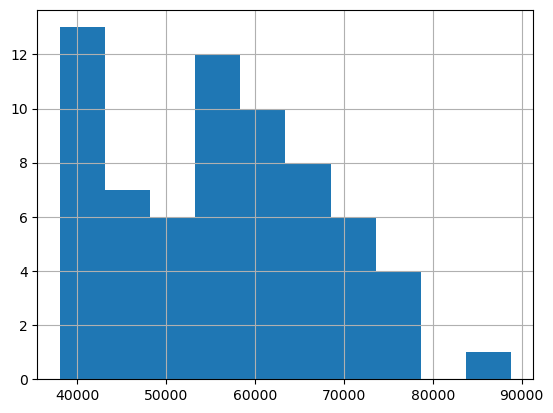

In [42]:
fl_income.Median_income.hist()

<Axes: >

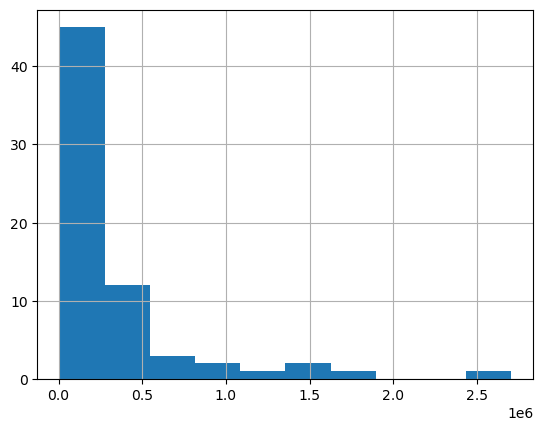

In [43]:
fl_pop.POPULATION.hist()

In [44]:
help(fl_income.Median_income.hist)

Help on method hist_series in module pandas.plotting._core:

hist_series(by=None, ax=None, grid: 'bool' = True, xlabelsize: 'int | None' = None, xrot: 'float | None' = None, ylabelsize: 'int | None' = None, yrot: 'float | None' = None, figsize: 'tuple[int, int] | None' = None, bins: 'int | Sequence[int]' = 10, backend: 'str | None' = None, legend: 'bool' = False, **kwargs) method of pandas.core.series.Series instance
    Draw histogram of the input series using matplotlib.
    
    Parameters
    ----------
    by : object, optional
        If passed, then used to form histograms for separate groups.
    ax : matplotlib axis object
        If not passed, uses gca().
    grid : bool, default True
        Whether to show axis grid lines.
    xlabelsize : int, default None
        If specified changes the x-axis label size.
    xrot : float, default None
        Rotation of x axis labels.
    ylabelsize : int, default None
        If specified changes the y-axis label size.
    yrot : flo

<Axes: >

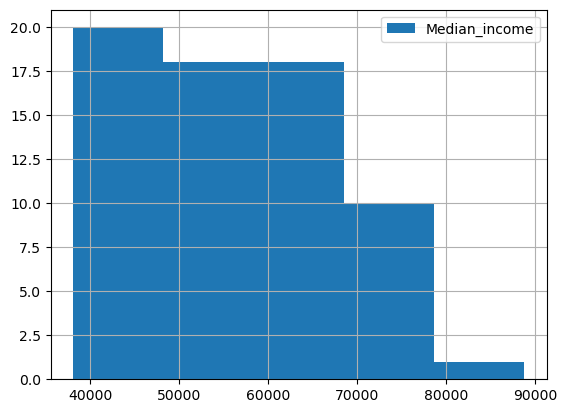

In [45]:
fl_income.Median_income.hist(bins=5, legend=True)

array([[<Axes: title={'center': 'Median_income'}>,
        <Axes: title={'center': 'new_column'}>],
       [<Axes: title={'center': 'Median_income_in_000s'}>,
        <Axes: title={'center': 'Geo_ID_5_int'}>],
       [<Axes: title={'center': 'FIPS'}>,
        <Axes: title={'center': 'POPULATION'}>]], dtype=object)

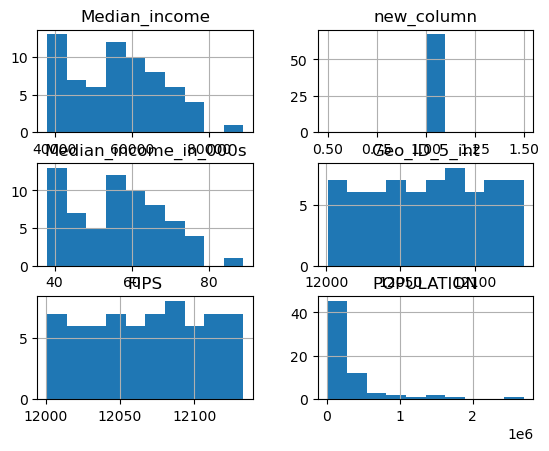

In [46]:
merged.hist()

Calculate pair-wise correlation coefficients for numerical columns

In [47]:
merged[["POPULATION","Median_income"]].corr()

,POPULATION,Median_income
POPULATION,1.000000,0.307076
Median_income,0.307076,1.000000


Scatterplot by specifying column names of x and y axis.

<Axes: xlabel='POPULATION', ylabel='Median_income'>

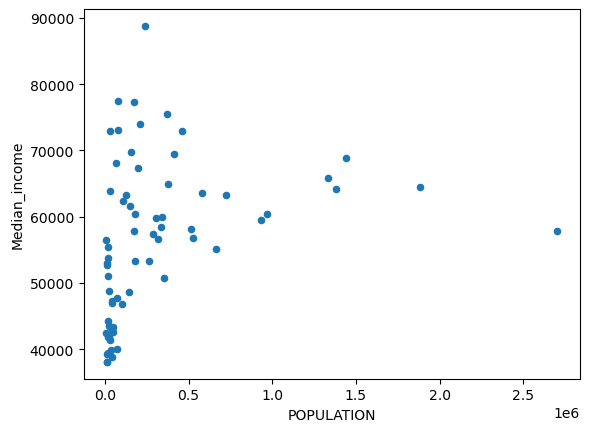

In [48]:
merged.plot(kind = 'scatter', x = 'POPULATION', y = 'Median_income')

### Group by and aggregation

Another common task is to summarize data across categories. In this case, we can use `.groupby()` function together with `.agg()` to do the job.


The `.groupby()` function in Pandas is used to group data based on the values in one or more columns. It splits the data into separate groups and allows you to perform aggregate operations (such as sum, mean, count, etc.) on each group independently. This is useful when you want to analyze data that falls into different categories or groups.


The `.agg()` function (short for aggregation) allows you to apply multiple aggregation operations to the grouped data. This is particularly powerful because you can specify different functions for different columns at the same time. It can work with a single column or across multiple columns in the DataFrame.

Consider we have a table

In [49]:
import pandas as pd

# Sample data for regions
data = {
    'Region': ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H'],
    'Population': [32000, 45000, 28000, 50000, 42000, 38000, 46000, 33000],
    'Area_km2': [10, 15, 8, 20, 12, 13, 18, 11],
    'Land_Use_Type': ['Residential', 'Commercial', 'Industrial', 'Residential', 
                      'Industrial', 'Residential', 'Commercial', 'Industrial']
}


df = pd.DataFrame(data)

# Adding a population density column for each region
df['Density'] = df['Population'] / df['Area_km2']
df

,Region,Population,Area_km2,Land_Use_Type,Density
0,A,32000,10,Residential,3200.000000
1,B,45000,15,Commercial,3000.000000
2,C,28000,8,Industrial,3500.000000
3,D,50000,20,Residential,2500.000000
4,E,42000,12,Industrial,3500.000000
5,F,38000,13,Residential,2923.076923
6,G,46000,18,Commercial,2555.555556
7,H,33000,11,Industrial,3000.000000



**Tasks:** Group by Land_Use_Type and calculate the following:

- Total Population for each land use type.
- Average Population Density for each land use type.
- Total Land Area for each land use type.

In [50]:
# Group by 'Land_Use_Type' and aggregate using .agg()
grouped = df.groupby('Land_Use_Type').agg(
    Total_Population=('Population', 'sum'),
    Avg_Density=('Density', 'mean'),
    Total_Area=('Area_km2', 'sum')
)

# Display the resulting DataFrame
grouped

,Total_Population,Avg_Density,Total_Area
Land_Use_Type,,,
Commercial,91000,2777.777778,33
Industrial,103000,3333.333333,31
Residential,120000,2874.358974,43


Explanation of `.groupby()` and `.agg()`:

- `.groupby('Land_Use_Type')`: This groups the DataFrame by the values in the Land_Use_Type column.
- `.agg()`: This function allows you to apply multiple aggregation operations to the grouped data.
- `Total_Population=('Population', 'sum')`: Sums up the population for each land use type.
- `Avg_Density=('Density', 'mean')`: Calculates the average population density for each land use type.
- `Total_Area=('Area_km2', 'sum')`: Sums up the total land area for each land use type.

### Documentation on https://pandas.pydata.org/docs/reference/general_functions.html